<h3 style="text-align: center;">КПІЗ<br>
з дисципліни «Інтервальні обчислення та інтервальний аналіз»<br>

<h3 style="text-align: center;">Виконав Іваськів І.С.</h3>

 

                                                           


In [56]:
import math
class Interval():
    
    def __init__(self,start,end):
        if start > end:
            raise ValueError("Start (%s) must not be greater then end (%s)" % (start,end))
        self._start = start
        self._end = end
        
    def __repr__(self):
        return "interval(%.6f, %.6f)" % (self.start, self.end)

    def __str__(self):
        return "[%.6f, %.6f]" % (self.start, self.end)
    
    
    @property
    def start(self):
        return self._start
    @property
    def end(self):
        return self._end
        
    #метод для додавання інтервалів   
    def __add__(self,other):
        if isinstance(other,Interval): # визначаємо чи додаємо інтервал чи число
            return Interval(self.start + other.start, self.end + other.end)
        else:
            start = other + self.start
            end = other + self.end
            return Interval(start,end)
    
    def __radd__(self, other):
        if isinstance(other, (int, float)):
            start = other + self.start
            end = other + self.end
            return Interval(start, end)
        elif isinstance(other, Interval):
            return other.__add__(self)
        else:
            return NotImplemented   
    
    #метод для віднімання інтервалів
    def __sub__(self,other):
        if isinstance(other,Interval): # визначаємо чи віднімаємо інтервал чи число
        
            ''' if (math.abs(self.start-other.start)<0.00001 and (math.abs(self.end-other.end)<0.00001)
                    return Interval(0,0)
                else:
                return Interval(self.start - other.end,self.end - other.start)
            '''
            return Interval(self.start - other.end,self.end - other.start)
        else:
            return self-Interval(other,other) 
    
    def __rsub__(self, other):
        if isinstance(other, (int, float)):
            start = other - self.end
            end = other - self.start
            return Interval(start, end)
        elif isinstance(other, Interval):
            return other.__sub__(self)
        else:
            return NotImplemented
        
    def __neg__(self):
        return Interval(-self.end, -self.start)
        
        
        
    # метод для множення інтервалів
    def __mul__(self,other):
        if isinstance(other,Interval): # визначаємо чи множимо на інтервал чи на число
            arr=[self.start*other.start,self.start*other.end,self.end*other.start,self.end*other.end]
            return Interval(round(min(arr),10),round(max(arr),10))    
            
        else:
            if other<0:
                return Interval(round(self.end * other,10),round(self.start * other,10))
            else:
                return Interval(round(self.start * other,10), round(self.end * other,10))
    
    def __rmul__(self, other):
        if isinstance(other, (int, float)):
            other = Interval(other,other)
            return other.__mul__(self)
        elif isinstance(other, Interval):
            return other.__mul__(self)
        else:
            return NotImplemented
    
    # метод для ділення інтервалів
    def __truediv__(self,other):
        if isinstance(other,Interval): # визначаємо чи ділимо на інтервал чи на число
            arr=[1/other.end,1/other.start]
            return self * Interval(min(arr),max(arr))                
        else:
            if other<0:
                return Interval(round(self.end / other,10), round(self.start / other,10))
            else:
                return Interval(round(self.start / other,10), round(self.end / other,10))
    
    def __rdiv__(self, other):
        if isinstance(other, (int, float)):
            other = Interval(other,other)
            return other.__truediv__(self)
        elif isinstance(other, Interval):
            return other.__truediv__(self)
        else:
            return NotImplemented
    
    __div__ = __truediv__
    __rtruediv__ = __rdiv__
    
    
    # обчислення об'єднання інтервалів
    
    def __and__(self,other):
        if isinstance(other, Interval):
            if self.end < other.start or other.end < self.start:
                return 0
            else:
                return Interval(max(self.start,other.start),min(self.end,other.end))
        elif isinstance(other, (int, float)):
            if Interval(other,other) in self:
                return Interval(other,other)
            else:
                return 0
        
        else: return NotImplemented
    
        
    
    #Обчислення середини інтервала
    def mid(i):
        return 1/2*(i.start+i.end)
    
    #Обчислення радіуса інтервала
    def rad(i):
        return 1/2*(i.end-i.start)
   
    # обчислення ширини інтервалу
    def d(self):
        return self.end - self.start
    
    #Операції порівняння
    def __eq__(self, other):
        if isinstance(other, (int, float)):
            if self.start == other and self.end == other:
                return True
            if other in self:
                return None
            else:
                return False

        if isinstance(other, Interval):
            if self.start == other.start and self.end == other.end:
                return True
            else:
                return False
        else:
            return NotImplemented

    def __ne__(self, other):
        if isinstance(other, (int, float)):
            if self.start == other and self.end == other:
                return False
            else:
                return True

        if isinstance(other, Interval):
            if self.start == other.start and self.end == other.end:
                return False
            else:
                return True
    
    
    def __contains__(self, other):
        if isinstance(other, (int, float)):
            return self.start <= other and self.end >= other
        else:
            return self.start <= other.start and other.end <= self.end

In [2]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt


## Обчислення функції та її похідної ##

In [3]:

def fxl(x):
    return math.log(math.pow(x,math.sin(2*x)))


In [49]:
def dfxl(x):
    return 1/(math.pow(x,math.sin(2*x)*math.log(2)))*(math.exp(math.sin(2*x)*math.log(x)))*(2*math.cos(2*x)*math.log(x)+math.sin(2*x)*(1/x))

In [5]:
#Тестова функція та її похідна:
def fxt(x):
    return -2*math.pow(x,2)+2

def dfxt(x):
    return -4*x

## Будуємо графік функції##

In [6]:
x=np.arange(0,5,0.1)


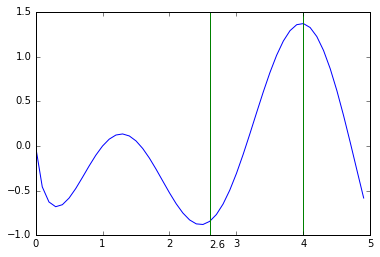

In [8]:
y=[fxl(k) for k in x]
plt.plot(x,y)
plt.axvline(x=2.6,color='g')
plt.axvline(x=4,color='g')
plt.text(2.6,-1.14,'2.6')
plt.show()

In [16]:
# Задаємо точність обчислень
eps=10**-6
# Початковий інтервал для тестової функції
X0=Interval(-2,-0.5)  

In [38]:
# Функція обчислення за методом Ньютона
# параметри - фунція, її похідна, початковий інтервал, точність, номер ітерації:
def Newton(fx,dfx,X0,eps,iterNo):
    print('\n\n')
    print("Ітерація: %i" % iterNo)
    print("X0: %s" % X0)
    
    #Знаходимо інтервал який складається з нижньої та верхної меж значень похідної функції у вихідному інтервалі  
   
    arr=[dfx(X0.start),dfx(X0.end)]
    M=Interval(min(arr),max(arr))
    
    print("M: %s" % M)
    
    #Знаходимо значення середину інтервалу X0
    mX0=X0.mid()
    print("mX0: %s" % mX0)
    
    #Знаходимо значення функції в mX0
    fmX0=fx(mX0)
    print("fmX0: %s" % fmX0)
    
    #Знаходимо наступне наближення X1 до розв'язку:
    inter1 = (mX0-fmX0/M)
    print('inter1: %s' % inter1)
    X1 = inter1 & X0
    print('X1: %s' % X1)
    
    if X1==0:
        return "Рішення не знайдено"
    
    #перевірка
    dx1=X1.d()
    dx0=(1/2*(1-M.start/M.end))*X0.d()
    
    if dx1 <= dx0:
        print ("%s < %s, - умова виконується" % (dx1,dx0))
    else:
        print ("%s > %s, - умова не виконується" % (dx1,dx0))
        return (X1)
    
    if dx1 < eps:  # точність досягнута
        return X1
    else:
        res=Newton(fx,dfx,X1,eps,iterNo+1)
        
        
    return res

### Запуск для тестової функції ###

In [39]:
res = Newton(fxt,dfxt,X0,eps,1)
print('Result: ', res)




Ітерація: 1
X0: [-2.0000, -0.5000]
M: [2.0000, 8.0000]
mX0: -1.25
fmX0: -1.125
inter1: [-1.1094, -0.6875]
X1: [-1.1094, -0.6875]
0.421875 < 0.5625, - умова виконується



Ітерація: 2
X0: [-1.1094, -0.6875]
M: [2.7500, 4.4375]
mX0: -0.8984375
fmX0: 0.3856201171875
inter1: [-1.0387, -0.9853]
X1: [-1.0387, -0.9853]
0.05332520000000007 < 0.08021566901408451, - умова виконується



Ітерація: 3
X0: [-1.0387, -0.9853]
M: [3.9414, 4.1547]
mX0: -1.0120004
fmX0: -0.04828961920031993
inter1: [-1.0004, -0.9997]
X1: [-1.0004, -0.9997]
0.0006290000000001017 < 0.0013688640853866973, - умова виконується



Ітерація: 4
X0: [-1.0004, -0.9997]
M: [3.9990, 4.0015]
mX0: -1.0000629
fmX0: -0.0002516079128205284
inter1: [-1.0000, -1.0000]
X1: [-1.0000, -1.0000]
0.0 < 1.9774587070846305e-07, - умова виконується
Result:  [-1.0000, -1.0000]


### Запуск для функції з контрольного завдання ###


In [58]:
res = Newton(fxl,dfxl,Interval(2.6,3.6),eps,1)
print('Result: ', res)




Ітерація: 1
X0: [2.600000, 3.600000]
M: [0.428778, 2.430257]
mX0: 3.1
fmX0: -0.09400752579025001
inter1: [3.138682, 3.319245]
X1: [3.138682, 3.319245]
0.1805631592000001 < 0.4117834453603324, - умова виконується



Ітерація: 2
X0: [3.138682, 3.319245]
M: [2.281048, 2.676095]
mX0: 3.2289637073
fmX0: 0.20378513113108918
inter1: [3.139625, 3.152814]
X1: [3.139625, 3.152814]
0.013188206900000221 < 0.01332744041784152, - умова виконується



Ітерація: 3
X0: [3.139625, 3.152814]
M: [2.283779, 2.321412]
mX0: 3.14621941505
fmX0: 0.010606250914165899
inter1: [3.141575, 3.141651]
X1: [3.141575, 3.141651]
7.528809999968189e-05 < 0.00010689912928055025, - умова виконується



Ітерація: 4
X0: [3.141575, 3.141651]
M: [2.289410, 2.289627]
mX0: 3.1416128924
fmX0: 4.633620254730283e-05
inter1: [3.141593, 3.141593]
X1: [3.141593, 3.141593]
2.000000165480742e-09 < 3.566815840227261e-09, - умова виконується
Result:  [3.141593, 3.141593]


In [59]:
# Перевірка результату
print(fxl(3.141593))

7.930923088545766e-07


In [60]:
# отже результат з точністю 10-6 знахидить 0 функції.